In [1]:
## colabを使用するときはマウントする。
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

# 作業用フォルダまでのパス
# 基本的に以下の場所で作業する(自分の環境次第)
base_path = '/content/drive/MyDrive/EMNIST/'

# zipファイルの解凍（zipファイル名は適宜変更）
zip_file_path = base_path + 'gzip.zip'
# ファイルの解凍先
extract_to_path = base_path

#Zipファイルを解凍
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [3]:
## 解凍できているかの確認
import os

# 解凍先のディレクトリ内のファイルやディレクトリの一覧を取得
extract_to_path_ = extract_to_path + 'gzip/' # フォルダ名は自身の解凍先を指定
extracted_files = os.listdir(extract_to_path_)

# 一覧を表示
print("解凍後のファイルやディレクトリ:")
for item in extracted_files:
    print(item)


解凍後のファイルやディレクトリ:
emnist-balanced-mapping.txt
emnist-balanced-test-labels-idx1-ubyte.gz
emnist-balanced-train-labels-idx1-ubyte.gz
emnist-byclass-test-labels-idx1-ubyte.gz
emnist-byclass-mapping.txt
emnist-balanced-test-images-idx3-ubyte.gz
emnist-balanced-train-images-idx3-ubyte.gz
emnist-byclass-test-images-idx3-ubyte.gz
emnist-byclass-train-images-idx3-ubyte.gz
emnist-bymerge-mapping.txt
emnist-bymerge-test-labels-idx1-ubyte.gz
emnist-byclass-train-labels-idx1-ubyte.gz
emnist-bymerge-test-images-idx3-ubyte.gz
emnist-bymerge-train-images-idx3-ubyte.gz
emnist-bymerge-train-labels-idx1-ubyte.gz
emnist-letters-mapping.txt
emnist-digits-mapping.txt
emnist-digits-test-labels-idx1-ubyte.gz
emnist-digits-train-labels-idx1-ubyte.gz
emnist-letters-test-images-idx3-ubyte.gz
emnist-digits-test-images-idx3-ubyte.gz
emnist-letters-test-labels-idx1-ubyte.gz
emnist-letters-train-images-idx3-ubyte.gz
emnist-digits-train-images-idx3-ubyte.gz
emnist-letters-train-labels-idx1-ubyte.gz
emnist-mnist-mappi

In [4]:
import gzip
import numpy as np
## データの読み取り関数
#画像用
def read_emnist_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        # マジックナンバーを読み飛ばす
        f.read(4)
        # アイテム数を読み取る
        num_items = int.from_bytes(f.read(4), 'big')
        # 画像の高さを読み取る
        rows = int.from_bytes(f.read(4), 'big')
        # 画像の幅を読み取る
        cols = int.from_bytes(f.read(4), 'big')
        # 画像データを読み取る
        data = f.read()
        # データをnumpy配列に変換し、形状を整える
        images = np.frombuffer(data, dtype=np.uint8).reshape(num_items, rows, cols)
    return images

#ラベル用
def read_emnist_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        # マジックナンバーを読み飛ばす
        f.read(4)
        # アイテム数を読み取る
        num_items = int.from_bytes(f.read(4), 'big')
        # ラベルデータを読み取る
        data = f.read()
        # データをnumpy配列に変換
        labels = np.frombuffer(data, dtype=np.uint8)
    return labels



In [5]:
# 実際にファイルから取り出す

### byclass
# 画像データ(トレーニング)を読み取る
byclass_train_images = read_emnist_images(extract_to_path_ + 'emnist-byclass-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
byclass_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-byclass-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
byclass_test_images = read_emnist_images(extract_to_path_ + 'emnist-byclass-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
byclass_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-byclass-test-labels-idx1-ubyte.gz')


### bymerge
# 画像データ(トレーニング)を読み取る
bymerge_train_images = read_emnist_images(extract_to_path_ + 'emnist-bymerge-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
bymerge_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-bymerge-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
bymerge_test_images = read_emnist_images(extract_to_path_ + 'emnist-bymerge-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
bymerge_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-bymerge-test-labels-idx1-ubyte.gz')


### balanced
# 画像データ(トレーニング)を読み取る
balanced_train_images = read_emnist_images(extract_to_path_ + 'emnist-balanced-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
balanced_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-balanced-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
balanced_test_images = read_emnist_images(extract_to_path_ + 'emnist-balanced-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
balanced_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-balanced-test-labels-idx1-ubyte.gz')


### letters
# 画像データ(トレーニング)を読み取る
letters_train_images = read_emnist_images(extract_to_path_ + 'emnist-letters-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
letters_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-letters-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
letters_test_images = read_emnist_images(extract_to_path_ + 'emnist-letters-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
letters_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-letters-test-labels-idx1-ubyte.gz')


### digits
# 画像データ(トレーニング)を読み取る
digits_train_images = read_emnist_images(extract_to_path_ + 'emnist-digits-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
digits_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-digits-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
digits_test_images = read_emnist_images(extract_to_path_ + 'emnist-digits-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
digits_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-digits-test-labels-idx1-ubyte.gz')


### mnist
# 画像データ(トレーニング)を読み取る
mnist_train_images = read_emnist_images(extract_to_path_ + 'emnist-mnist-train-images-idx3-ubyte.gz')
# ラベルデータ(トレーニング)を読み取る
mnist_train_labels = read_emnist_labels(extract_to_path_ + 'emnist-mnist-train-labels-idx1-ubyte.gz')
# 画像データ(テスト)を読み取る
mnist_test_images = read_emnist_images(extract_to_path_ + 'emnist-mnist-test-images-idx3-ubyte.gz')
# ラベルデータ(テスト)を読み取る
mnist_test_labels = read_emnist_labels(extract_to_path_ + 'emnist-mnist-test-labels-idx1-ubyte.gz')

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

##データセットの作成
# データセットの仕様を変更したい場合はここを変更
class EMNIST_Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [9]:
## データセットを作成

# byclass
emnist_byclass_train_dataset = EMNIST_Dataset(byclass_train_images, byclass_train_labels, transform=transforms.ToTensor())
emnist_byclass_test_dataset = EMNIST_Dataset(byclass_test_images, byclass_test_labels, transform=transforms.ToTensor())

# bymerge
emnist_bymerge_train_dataset = EMNIST_Dataset(bymerge_train_images, bymerge_train_labels, transform=transforms.ToTensor())
emnist_bymerge_test_dataset = EMNIST_Dataset(bymerge_test_images, bymerge_test_labels, transform=transforms.ToTensor())

# balanced
emnist_balanced_train_dataset = EMNIST_Dataset(balanced_train_images, balanced_train_labels, transform=transforms.ToTensor())
emnist_balanced_test_dataset = EMNIST_Dataset(balanced_test_images, balanced_test_labels, transform=transforms.ToTensor())

# letters
emnist_letters_train_dataset = EMNIST_Dataset(letters_train_images, letters_train_labels, transform=transforms.ToTensor())
emnist_letters_test_dataset = EMNIST_Dataset(letters_test_images, letters_test_labels, transform=transforms.ToTensor())

# digits
emnist_digits_train_dataset = EMNIST_Dataset(digits_train_images, digits_train_labels, transform=transforms.ToTensor())
emnist_digits_test_dataset = EMNIST_Dataset(digits_test_images, digits_test_labels, transform=transforms.ToTensor())

# mnist
emnist_mnist_train_dataset = EMNIST_Dataset(mnist_train_images, mnist_train_labels, transform=transforms.ToTensor())
emnist_mnist_test_dataset = EMNIST_Dataset(mnist_test_images, mnist_test_labels, transform=transforms.ToTensor())


In [12]:
## データセットの確認

print("----------byclass----------")
print("train：", len(emnist_byclass_train_dataset))
print("test：", len(emnist_byclass_test_dataset))
print("----------bymerge----------")
print("train：", len(emnist_bymerge_train_dataset))
print("test：", len(emnist_bymerge_test_dataset))
print("----------balanced----------")
print("train：", len(emnist_balanced_train_dataset))
print("test：", len(emnist_balanced_test_dataset))
print("----------letters----------")
print("train：", len(emnist_letters_train_dataset))
print("test：", len(emnist_letters_test_dataset))
print("----------digits----------")
print("train：", len(emnist_digits_train_dataset))
print("test：", len(emnist_digits_test_dataset))
print("----------mnist----------")
print("train：", len(emnist_mnist_train_dataset))
print("test：", len(emnist_mnist_test_dataset))

----------byclass----------
train： 697932
test： 116323
----------bymerge----------
train： 697932
test： 116323
----------balanced----------
train： 112800
test： 18800
----------letters----------
train： 124800
test： 20800
----------digits----------
train： 240000
test： 40000
----------mnist----------
train： 60000
test： 10000


サンプル画像の形状: torch.Size([1, 28, 28])
サンプルラベル: 35


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:153: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


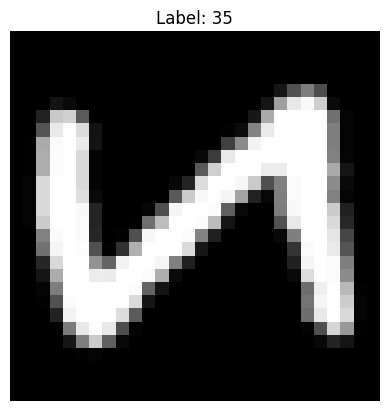

In [13]:
# データセットからサンプルを取得してみる
sample_image, sample_label = emnist_byclass_train_dataset[0]
print("サンプル画像の形状:", sample_image.shape)
print("サンプルラベル:", sample_label)


import matplotlib.pyplot as plt

# サンプル画像を表示
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

In [14]:
# データローダーの作成


# byclass
emnist_byclass_train_dataloader = DataLoader(emnist_byclass_train_dataset, batch_size=32, shuffle=True)
emnist_byclass_test_dataloader = DataLoader(emnist_byclass_test_dataset, batch_size=32, shuffle=False)

# bymerge
emnist_bymerge_train_dataloader = DataLoader(emnist_bymerge_train_dataset, batch_size=32, shuffle=True)
emnist_bymerge_test_dataloader = DataLoader(emnist_bymerge_test_dataset, batch_size=32, shuffle=False)

# balanced
emnist_balanced_train_dataloader = DataLoader(emnist_balanced_train_dataset, batch_size=32, shuffle=True)
emnist_balanced_test_dataloader = DataLoader(emnist_balanced_test_dataset, batch_size=32, shuffle=False)

# letters
emnist_letters_train_dataloader = DataLoader(emnist_letters_train_dataset, batch_size=32, shuffle=True)
emnist_letters_test_dataloader = DataLoader(emnist_letters_test_dataset, batch_size=32, shuffle=False)

# digits
emnist_digits_train_dataloader = DataLoader(emnist_digits_train_dataset, batch_size=32, shuffle=True)
emnist_digits_test_dataloader = DataLoader(emnist_digits_test_dataset, batch_size=32, shuffle=False)

# mnist
emnist_mnist_train_dataloader = DataLoader(emnist_mnist_train_dataset, batch_size=32, shuffle=True)
emnist_mnist_test_dataloader = DataLoader(emnist_mnist_test_dataset, batch_size=32, shuffle=False)
